
# CNN - Image Classification - SoAI - WK2 - Navneet Dubey
---


# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

Package                          Version
-------------------------------- -------------------
absl-py                          1.4.0
accelerate                       0.34.2
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.16
albumentations                   1.4.15
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.19.0
astropy                          6.1.3
astropy-iers-data                0.2024.9.16.0.32.21
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread                        3.0.1
autograd                 

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [ ]:
!git clone https://github.com/ThunderE75/CNN-ImageClassification.git

fatal: destination path 'CNN-ImageClassification' already exists and is not an empty directory.


In [ ]:
data_dir = '/content/CNN-ImageClassification/data/'

In [ ]:
import os
import cv2
import imghdr

data_dir = '/content/CNN-ImageClassification/data'

# Supported image extensions
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

# Iterate over the classes (folders) and images
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)

    # Check if it's a directory
    if os.path.isdir(class_dir):
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            try:
                # Read image and check extension
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)

                # Check if the file has a valid image extension
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))
                # os.remove(image_path)  # Uncomment if you want to delete corrupted files

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

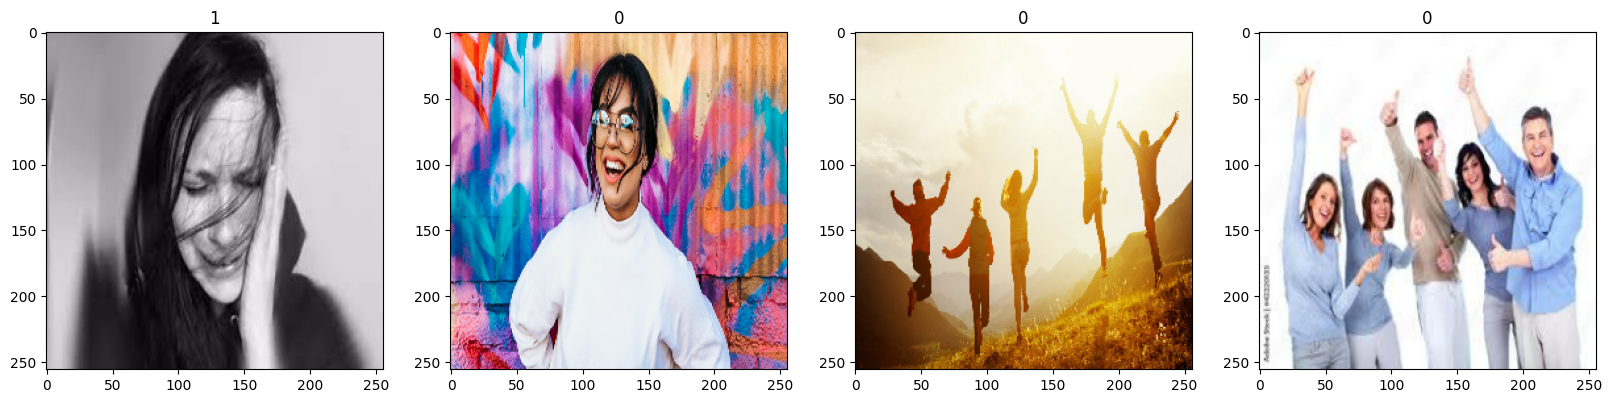

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          ...,
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79263175, 0.7847886 , 0.7965533 ]],
 
         [[0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          ...,
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79263175, 0.7847886 , 0.7965533 ]],
 
         [[0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          ...,
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79263175, 0.7847886 , 0.7965533 ]],
 
         ...,
 
         [[0.5890106 , 0.28802463, 0.2644201 ],
          [0.50568

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

7

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Training

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4963 - loss: 1.0685 - val_accuracy: 0.4375 - val_loss: 0.6838
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4838 - loss: 0.6615 - val_accuracy: 0.6562 - val_loss: 0.6326
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7438 - loss: 0.5881 - val_accuracy: 0.8281 - val_loss: 0.5094
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7921 - loss: 0.5142 - val_accuracy: 0.7500 - val_loss: 0.4849
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8349 - loss: 0.4310 - val_accuracy: 0.8438 - val_loss: 0.4004
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8564 - loss: 0.3960 - val_accuracy: 0.8750 - val_loss: 0.3526
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8493 - loss: 0.3593 - val_accuracy: 0.7656 - val_loss: 0.4341
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8516 - loss: 0.3490 - val_accuracy: 0.9062 - val_loss: 0.2868
Epoch 9/

# 8. plot performence

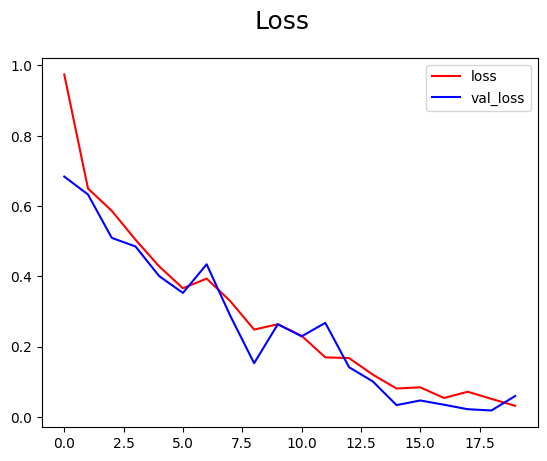

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=18)
plt.legend(loc="upper right")
plt.show()

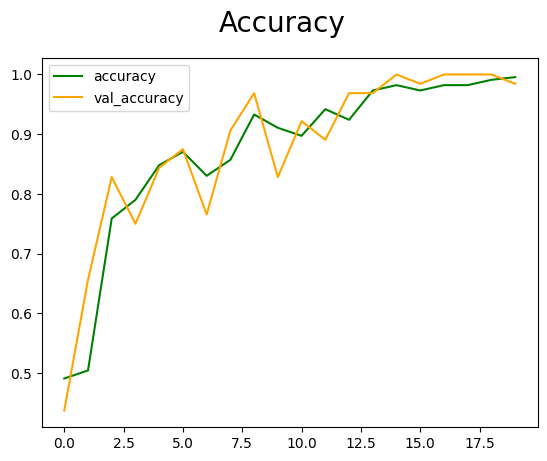

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluation

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Testing

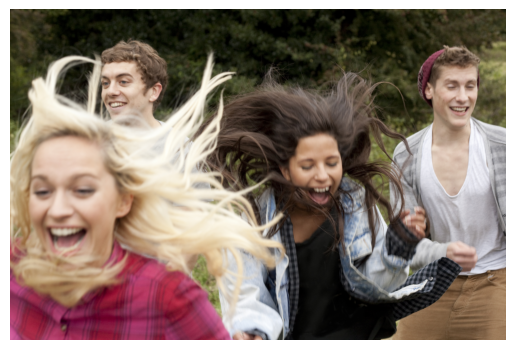

In [ ]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

# t\Test Image 1
url = "https://raw.githubusercontent.com/ThunderE75/CNN-ImageClassification/2699669029524d58a111c7918b8fb7a2d8f7a1f1/test_image1.jpg"

# Download the image
response = requests.get(url)

if response.status_code == 200:  # Check if the request was successful
    image_array = np.frombuffer(response.content, np.uint8)
    img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Check if image was decoded correctly
    if img is not None:
        # Display the image
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Hide the axes
        plt.show()
    else:
        print("Error: Image could not be decoded properly.")
else:
    print("Error: Unable to download the image.")

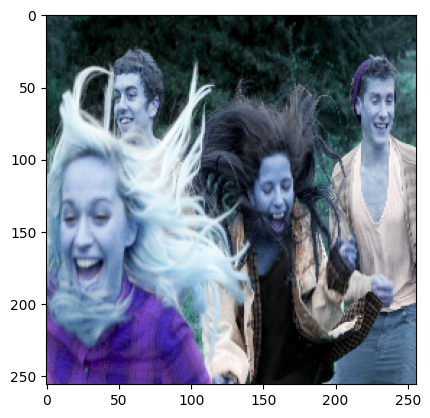

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [ ]:
yhat

array([[0.99261016]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

model.save(os.path.join('models','imageclassifier.keras'))

In [ ]:
import os
import numpy as np
from keras.models import load_model

# Assuming the model is already loaded into a variable called `model`
# Example code to load the model
model_path = 'models/imageclassifier.keras'  # Adjust if necessary
if os.path.isfile(model_path):
    model = load_model(model_path)
    print("Model loaded successfully!")
else:
    print(f"Error: The file '{model_path}' does not exist.")

# Assuming you have already resized the image (and it's stored in a variable called `resize`)
# Make sure your image is preprocessed correctly (normalized, resized, etc.)
# Example of predicting with the model
prediction = model.predict(np.expand_dims(resize / 255.0, axis=0))

# Print the prediction result
print("Prediction:", prediction)

Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Prediction: [[0.99261016]]
